##### _Group #36 Project Proposal_
## Heart Disease Dataset

In [88]:
# These packages need to be loaded

library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(GGally)

options(repr.matrix.max.rows = 6)
set.seed(1)

# _1) Introduction:_

* Heart disease is an increasingly prevalent and crippling disease accepting a multitude of different people across the globe. Given its severity, the ability to accurately diagnose the disease early is becoming increasingly important to ensure the longevity of these affected individuals. 

* Within our project we are looking to see if (variable columns of interest) can accurately predict the diagnosis of heart disease. 

* The data set we will be using is a compiled data set about Heart Disease which we found on KAGGLE. It consists of different onset heart disease indicators with data from multiple different countries and spanning from 1988 onwards. The data was measured upon hospital admission for acute chest pain. This data set includes data on the age, sex, cheat pain type from 0-4, the resting blood pressure, serum cholestoral level in the blood, the fasting blood sugar, the resting electrocardiographic results with values 0-2, the maximum heart rate achieved, the presence of exercise induced angina, data about results of electrocartiogram tests including the ST depression value and the slope of the ST segment, # of major vessels from 0-3, and thal with 0 as normal, 1 as fixed defect and 2 as reversable defect. 

* Finally, the last column, target column, represents the presence of heart disease in the patient with the following two cases:
            1. 0 = no disease
            2. 1 = disease



------------------------------------------------------------------------------------------------------------------


# _2) Preliminary exploratory data analysis:_

##### Below we demonstrate that the dataset can be read from the web into R through a URL. We clean and wrangle our data into a tidy format by removing the repeated observations in the set. It was stated on the website where we retrieved the data from therefore we removed repeated observations using unique() function. This decreases the total rows from 1025 to 302. Otherwise, our data is already in a tidy format because in each column there is one variable and each row has one observation

* I perform the as_factor() function on the target column because that is the column we are using for our question

In [86]:
url <- "https://raw.githubusercontent.com/sadia-kd/DSCI-Project/main/heart.csv"

heart_disease <- read_csv(url) %>%
    mutate(target = as_factor(target)) %>%
    unique()

heart_disease

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### Explore The Data

* Here, I summarized the data in a table (exploratory data analysis). We have a table that reports the number of observations in each class, in the training data


In [87]:
# Here we split the data into training and testing data so we can further use only
# training data for exploratory data analysis

heart_disease_split <- initial_split(heart_disease, prop = 0.75, strata = target)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split) 

In [57]:
# Summarize the DATA 

obs <- nrow(heart_disease_train)

data_count <- heart_disease_train %>%
    group_by(target) %>%
    summarize(count = n(), percentage = n()/obs * 100)

data_count
     
#data_mean<- 
#missingdata<-

`summarise()` ungrouping output (override with `.groups` argument)



target,count,percentage
<fct>,<int>,<dbl>
0,104,45.81498
1,123,54.18502


This illustrates that in this data set, about 46% do not have a heart disease (0) , and 54 % do have a heart disease (1)


-----------------------------------------------------------------------------------------------------------------


### Visualize the Data

* Using only training data, we visualize the data relevant to our analysis we plan to do. An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [72]:
# I Scale and Center the DATA here and use this to get more affective plots

scaled_heart_disease <- recipe(target  ~ ., data = heart_disease_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>%
    prep() %>%
    bake(heart_disease_train)

scaled_heart_disease

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.2867331,0.652525,-0.9334544,-0.4179471,-0.7033079,-0.4614774,0.8818959,0.8544490,-0.6869773,-0.05272773,0.9500446,1.1993758,1.154297,0
-0.1750891,0.652525,-0.9334544,0.4236318,-0.8839311,2.1574071,-0.9890422,0.2727929,1.4492397,1.74265145,-2.1529787,-0.7247112,1.154297,0
1.7228574,0.652525,-0.9334544,0.7041581,-1.4659394,-0.4614774,0.8818959,-1.0694902,1.4492397,1.31518022,-2.1529787,-0.7247112,1.154297,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.28673305,0.652525,-0.9334544,-0.2496313,0.1596699,-0.4614774,0.8818959,0.5412496,1.4492397,-0.9076702,0.9500446,0.2373323,1.1542968,0
0.49477435,0.652525,1.9429368,1.5457370,0.5209164,-0.4614774,-0.9890422,-1.0694902,-0.6869773,-0.9076702,0.9500446,-0.7247112,-0.4631438,0
-0.06344522,0.652525,-0.9334544,-0.6984734,-1.1849699,-0.4614774,0.8818959,-1.6064035,-0.6869773,0.2892493,-0.6014671,0.2373323,1.1542968,0


In [73]:
# I plot a graph of cholesterol levels vs. maximum heart rate achieved

plot_1 <- scaled_heart_disease %>%
    ggplot(aes(x = thalach, y =chol, color = target)) +
    geom_point() +
    labs(x = "Maximum Heart Rate Achieved", y = "Cholesterol Levels", color = "Heart Diease or No") +
    ggtitle("Cholesterol Levels vs Maximum Heart Rate Achieved")

In [74]:
plot_2 <- scaled_heart_disease %>%
    ggplot(aes(x = age, y = trestbps, color = target)) +
    geom_point() +
    labs(x = "Age", y = "Resting Blood Presure (mm Hg)", color = "Heart Disease or NO")

In [75]:
plot_3 <- scaled_heart_disease %>%
    ggplot(aes(x = age, y = oldpeak, color = target)) +
    geom_point() +
    labs(x = "Age", y = "ST depression", color = "Heart Disease or NO")

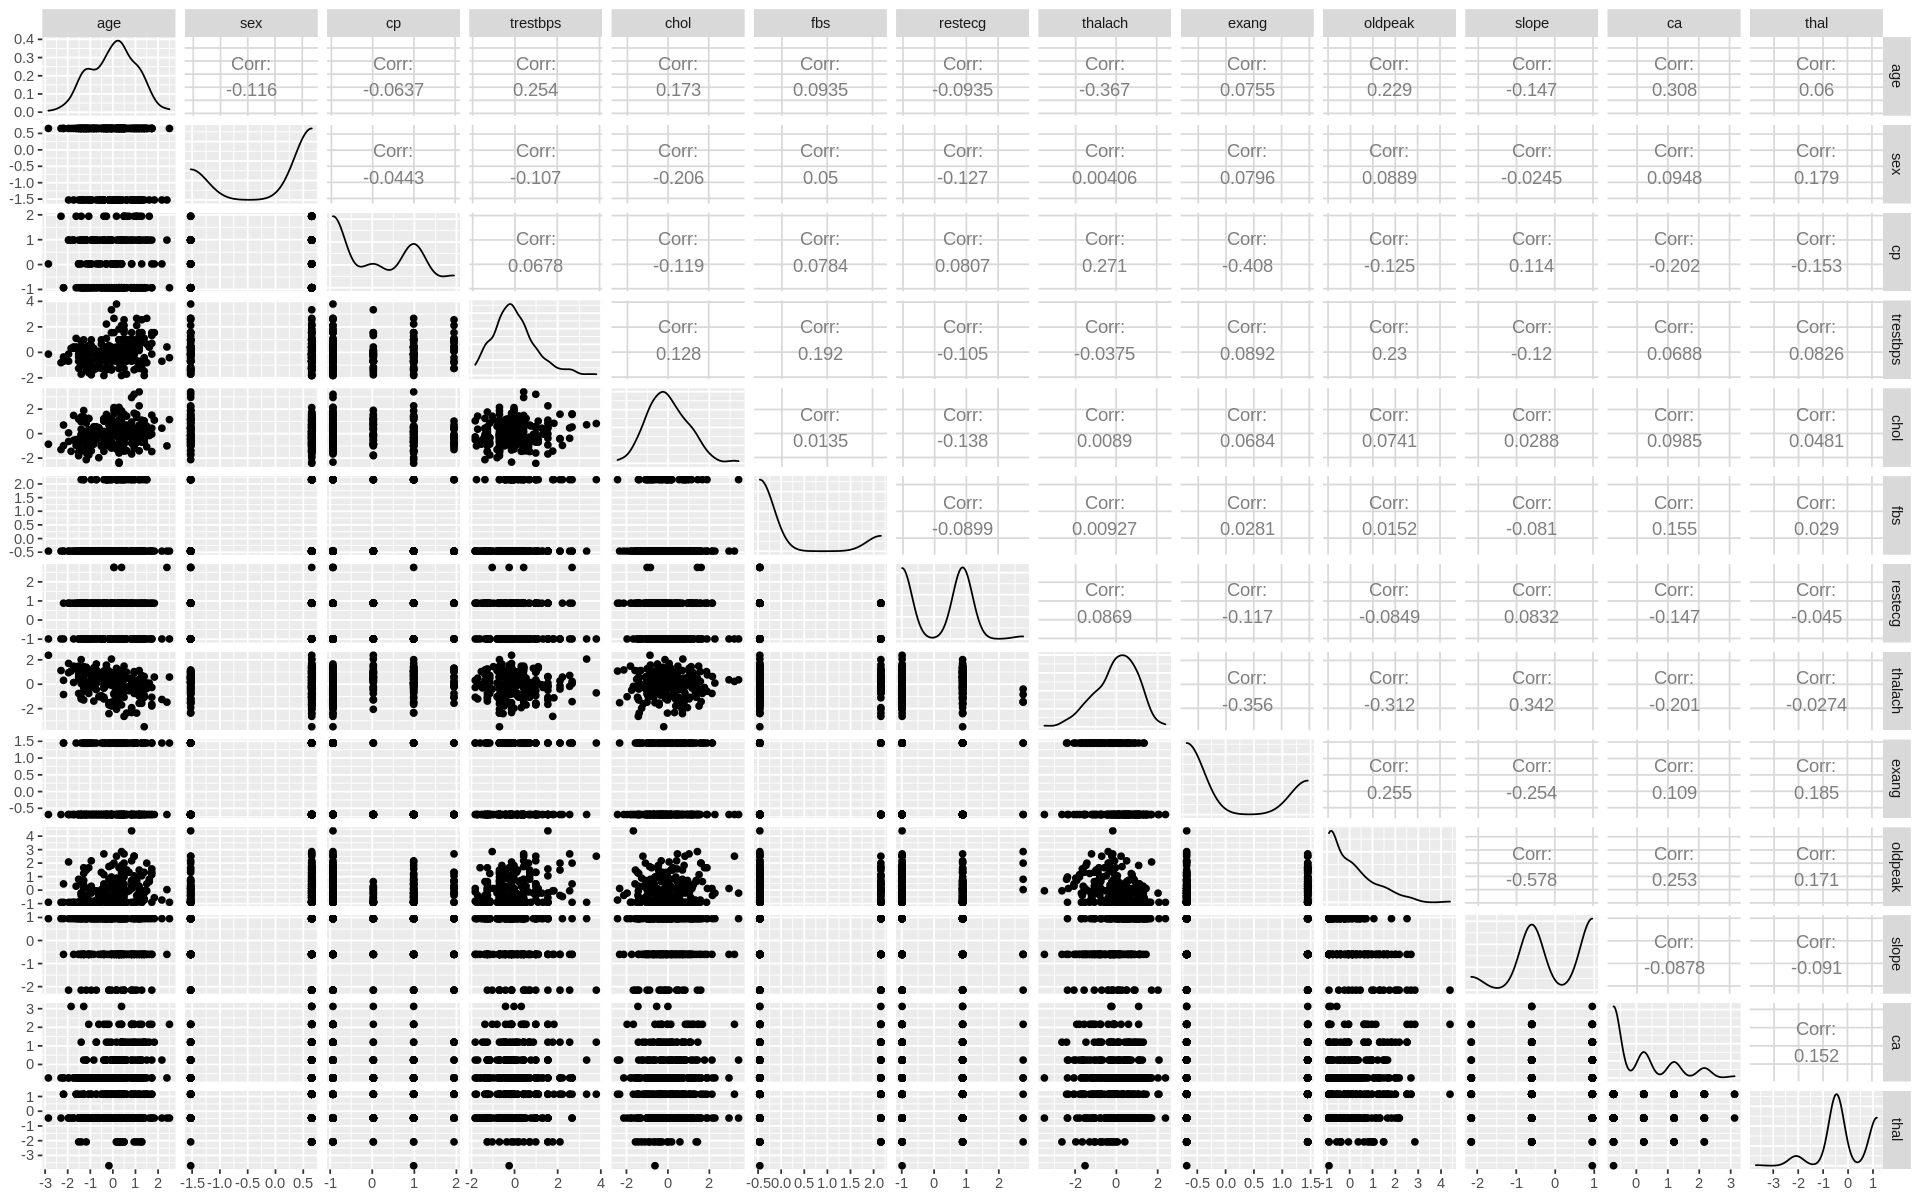

In [84]:
# Plot all predictors against each other
options(repr.plot.width = 16, repr.plot.height = 10) 

plots <- ggpairs(scaled_heart_disease, mapping = NULL, columns = 1:13) 

plots


------------------------------------------------------------------------------------------------------------------


# _3) METHODS:_

##### 1) Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

### Data analysis steps:

1. Formulate a precise question that we want to answer:
    - Can age and maximum heart rate achieved can accurately predict the diagnosis of heart disease?
    
    
2. Loading the data: 
    - start by loading the tidyverrse package
    - Read the dataset using read_csv with no additional arguments, and then inspect its contents
    - Use function glimpse(dataset) to preview the data frame
    - Use function pull to extract a single column (target) and pass that into levels function to see the categories in the target column. 


3. Exploring the data
    - Use the group_by, summarize and n function to find the number and percentage of having heart disease(integer value = 1) or not (integer value = 0).
    - Draw a scatter plot to visualize the relationship between age and maximum heart rate achieved variables.
    - Based on the visualization, decide if these are useful variable for prediction
    -  Classification with K-nearest neighbors


4. Split the dataset into training data and testing data
    - Set the seed as set.seed(1)
    - Use the initial_split function to create the training and testing sets


5. Choose a K value
    - Load library tidymodels
    - Pick out our two desired predictor variables and class label and store them as a new data set
    - Create a model specification for K-nearest neighbors classification by calling the nearest_neighbor function.
    - Pass the model specification and the dataset to the fit function
    - Now we can use the predict function to predict our testing data.

### Reason to choose age and maximum heart rate achieved:

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)



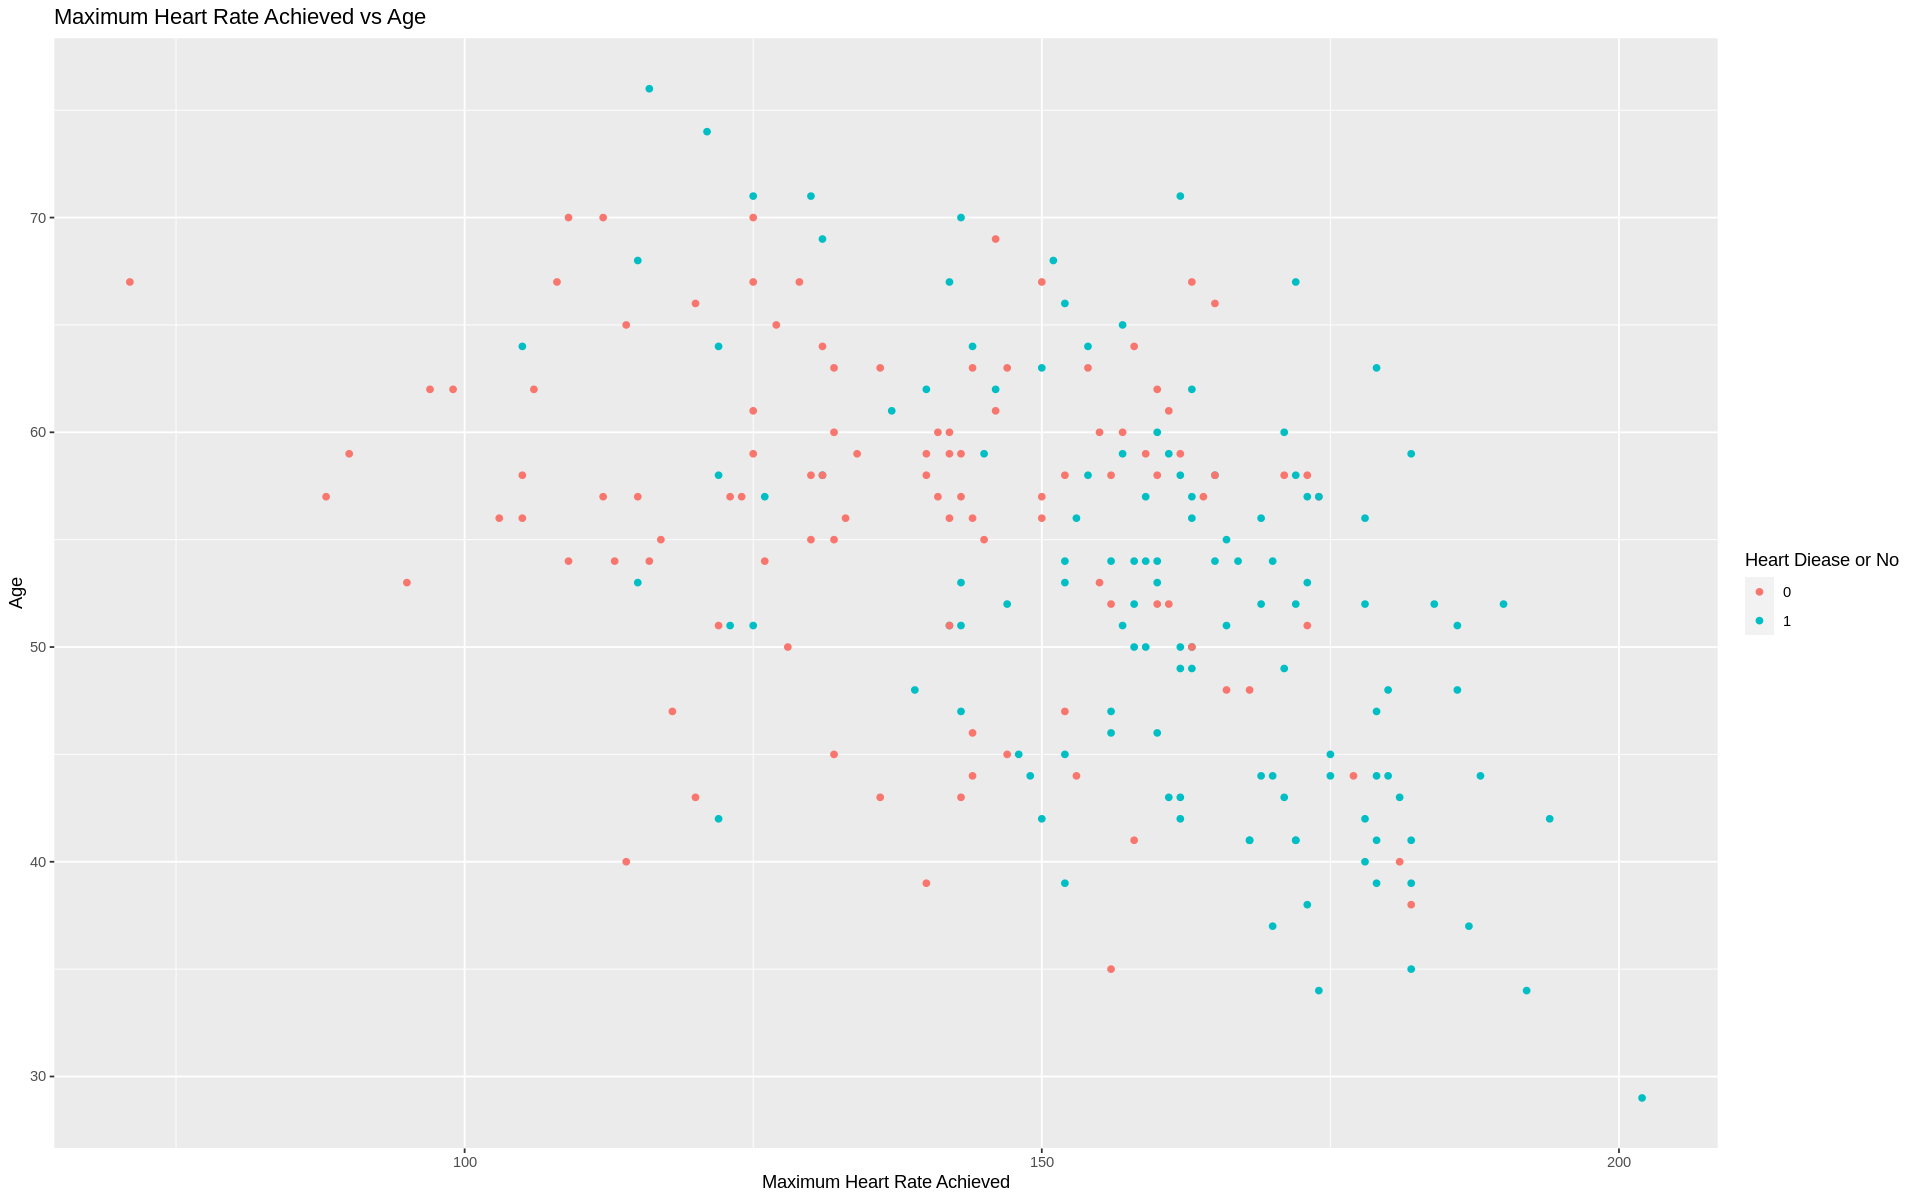

In [85]:
data <- read_csv("heart.csv") %>%
    mutate(target = as_factor(target))

unique_data <- unique(data)

data_split <- initial_split(unique_data, prop = 0.75, strata = target)
data_train <- training(data_split)
data_test <- testing(data_split) 

heart_disease_var_check <- data_train %>%
    ggplot(aes(x = thalach, y=age, color = target)) +
    geom_point() +
    labs(x = "Maximum Heart Rate Achieved", y = "Age", color = "Heart Diease or No") +
    ggtitle("Maximum Heart Rate Achieved vs Age")

heart_disease_var_check

2. Describe at least one way that you will visualize the results

To visulize the results, we will use annonate() function to help. annoate("text", ...) to label the new observation and the nearest K observations, then use annonate("path",...) to circle thoese obervations. It will be clear to show the votes and see the results.


------------------------------------------------------------------------------------------------------------------


# _4) Expected outcomes and significance:_

1. What do you expect to find?
2. What impact could such findings have?
3. What future questions could this lead to?

- Our classification model aims to provide a reliable and automatic diagnosis for the presence of heart disease. We conduct a comprehensive analysis based on real data collection, a history of common symptoms and medical abnormality detection tests. Multiple predictions then are simultaneously and instantly generated by an automatic and technological-based model. This mechanism reduces potential human errors and time consumption in large data tracing and processing. Therefore, the classification model enhances the reliability, objectivity, and efficiency for heart disease screening.

- While this model aids the detection of present heart disease, the specific subtypes of patients’ heart disease remain undiagnosed. As there are several types of heat-related illness, future questions could advance the prediction and classification of these subtypes. For example, Coronary Artery Disease (CAD) is one of the most common heart diseases. Which further medical tests should be run and which predictors should be used in CAD diagnosis are the possible questions for data analysts and medical researchers to investigate on.
